In [4]:
import pandas as pd

# Load Excel files from 'data' folder
weighted_df = pd.read_excel("data/confidence_weighted.xlsx")
simple_df = pd.read_excel("data/simple_average.xlsx")

# Rename actual score columns for clarity
weighted_df = weighted_df.rename(columns={"Weighted Overall": "FinalScore_Weighted"})
simple_df = simple_df.rename(columns={"Average Overall": "FinalScore_Simple"})

# Merge on Submission Title
comparison_df = pd.merge(weighted_df, simple_df, on="Submission Title")

# Calculate score difference
comparison_df["ScoreDiff"] = comparison_df["FinalScore_Weighted"] - comparison_df["FinalScore_Simple"]

# Sort by biggest gain
comparison_df_sorted = comparison_df.sort_values(by="ScoreDiff", ascending=False)

# Save output
comparison_df_sorted.to_excel("output/final_comparison.xlsx", index=False)


# Show top 10
comparison_df_sorted[["Submission Title", "FinalScore_Weighted", "FinalScore_Simple", "ScoreDiff"]].head(10)


,Submission Title,FinalScore_Weighted,FinalScore_Simple,ScoreDiff
142,jGrlOrjqCzsv,3.83,3.25,0.58
984,DDxOygmIippV,4.33,4.00,0.33
747,KvesScxlbYZo,4.00,3.67,0.33
732,iPVsjISqGYjc,2.57,2.25,0.32
1118,mClUjlPJgeMk,3.57,3.25,0.32
153,jAvqWIRouqeo,3.57,3.25,0.32
1673,wQoGGNXEwIna,3.56,3.25,0.31
1012,OFildaoRLtWu,3.29,3.00,0.29
1477,GzkbxIfDtyOt,2.60,2.33,0.27
937,oGnkzKBCNpMX,3.25,3.00,0.25


In [5]:
print("Weighted Columns:\n", weighted_df.columns)
print("\nSimple Columns:\n", simple_df.columns)


Weighted Columns:
 Index(['Submission ID', 'Submission Title', 'Acceptance Status',
       'Primary Track', 'Num of Reviews', 'FinalScore_Weighted'],
      dtype='object')

Simple Columns:
 Index(['Submission ID', 'Submission Title', 'Acceptance Status',
       'Primary Track', 'Num of Reviews', 'FinalScore_Simple'],
      dtype='object')


In [6]:
# Replace these column names based on what you see from the print output
weighted_df = weighted_df.rename(columns={"<actual-weighted-score-column>": "FinalScore_Weighted"})
simple_df = simple_df.rename(columns={"<actual-simple-score-column>": "FinalScore_Simple"})


In [7]:
comparison_df = pd.merge(weighted_df, simple_df, on="Submission Title")
comparison_df["ScoreDiff"] = comparison_df["FinalScore_Weighted"] - comparison_df["FinalScore_Simple"]
comparison_df_sorted = comparison_df.sort_values(by="ScoreDiff", ascending=False)
comparison_df_sorted[["Submission Title", "FinalScore_Weighted", "FinalScore_Simple", "ScoreDiff"]].head(10)


,Submission Title,FinalScore_Weighted,FinalScore_Simple,ScoreDiff
142,jGrlOrjqCzsv,3.83,3.25,0.58
984,DDxOygmIippV,4.33,4.00,0.33
747,KvesScxlbYZo,4.00,3.67,0.33
732,iPVsjISqGYjc,2.57,2.25,0.32
1118,mClUjlPJgeMk,3.57,3.25,0.32
153,jAvqWIRouqeo,3.57,3.25,0.32
1673,wQoGGNXEwIna,3.56,3.25,0.31
1012,OFildaoRLtWu,3.29,3.00,0.29
1477,GzkbxIfDtyOt,2.60,2.33,0.27
937,oGnkzKBCNpMX,3.25,3.00,0.25


In [8]:
print("Weighted DF Columns:\n", weighted_df.columns.tolist())
print("\nSimple DF Columns:\n", simple_df.columns.tolist())


Weighted DF Columns:
 ['Submission ID', 'Submission Title', 'Acceptance Status', 'Primary Track', 'Num of Reviews', 'FinalScore_Weighted']

Simple DF Columns:
 ['Submission ID', 'Submission Title', 'Acceptance Status', 'Primary Track', 'Num of Reviews', 'FinalScore_Simple']


In [9]:
weighted_df = weighted_df.rename(columns={"Weighted Overall": "FinalScore_Weighted"})
simple_df = simple_df.rename(columns={"Average Overall": "FinalScore_Simple"})


In [10]:
comparison_df = pd.merge(weighted_df, simple_df, on="Submission Title")
comparison_df["ScoreDiff"] = comparison_df["FinalScore_Weighted"] - comparison_df["FinalScore_Simple"]

# Sort by largest difference
comparison_df_sorted = comparison_df.sort_values(by="ScoreDiff", ascending=False)

# Show top 10
comparison_df_sorted[["Submission Title", "FinalScore_Weighted", "FinalScore_Simple", "ScoreDiff"]].head(10)


,Submission Title,FinalScore_Weighted,FinalScore_Simple,ScoreDiff
142,jGrlOrjqCzsv,3.83,3.25,0.58
984,DDxOygmIippV,4.33,4.00,0.33
747,KvesScxlbYZo,4.00,3.67,0.33
732,iPVsjISqGYjc,2.57,2.25,0.32
1118,mClUjlPJgeMk,3.57,3.25,0.32
153,jAvqWIRouqeo,3.57,3.25,0.32
1673,wQoGGNXEwIna,3.56,3.25,0.31
1012,OFildaoRLtWu,3.29,3.00,0.29
1477,GzkbxIfDtyOt,2.60,2.33,0.27
937,oGnkzKBCNpMX,3.25,3.00,0.25


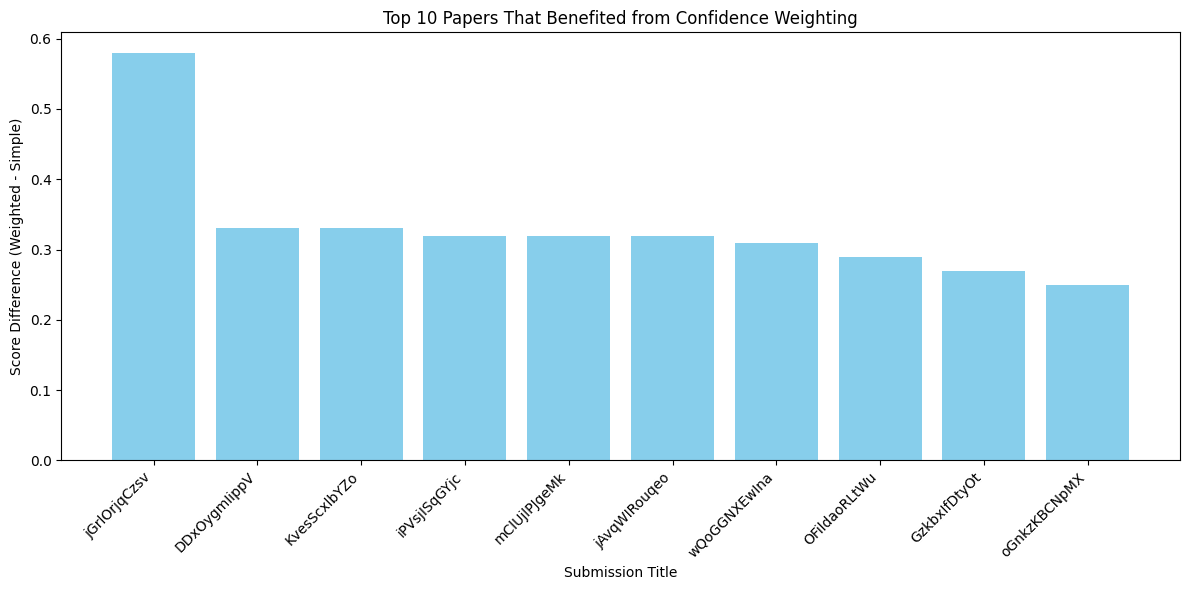

In [11]:
import matplotlib.pyplot as plt

top_diff = comparison_df_sorted.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_diff["Submission Title"], top_diff["ScoreDiff"], color='skyblue')
plt.xlabel("Submission Title")
plt.ylabel("Score Difference (Weighted - Simple)")
plt.title("Top 10 Papers That Benefited from Confidence Weighting")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
